In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from pypdf import PdfWriter

c:\ProgramData\anaconda3\Lib\site-packages\pypdf\_crypt_providers\_cryptography.py:32: CryptographyDeprecationWarning: ARC4 has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.ARC4 and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  from cryptography.hazmat.primitives.ciphers.algorithms import AES, ARC4


In [2]:
with open('jjbeventsthermal.pkl', 'rb') as file:
    events = pickle.load(file)

In [3]:
print(len(events))

693


In [4]:
theEvent=events[0]

In [5]:
print(len(theEvent))

449


In [ ]:
surfIdx = 25
for eventNum in range(len(events)):
    theEvent=events[eventNum]
    data = np.empty((0))
    for i in range(len(theEvent)):
        ## First 8 bytes of each fragments is the header, strip that off (offset = 8) during byte reading and concatenation
        data = np.concatenate((data, np.frombuffer(theEvent[i], dtype = np.int16, offset = 8)))
    # print(len(data))
    ## First 128 bytes of data is more headers, remove it
    data = data[128:]

    ## Reshape to be split into SURF#, Channel#
    data = np.reshape(data, (28, 8, 1024))
    for chanIdx in range(8):
        with open("csv/thermal_surf_%d_chan_%d_event_%d.csv"%(surfIdx, chanIdx, eventNum), 'w') as outfile:
            for datum in data[surfIdx][chanIdx]:
                outfile.write("%d\n"%datum)

229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504
229504

In [21]:
surfIdx = 26
eventNum = 500
chanIdx=1

theEvent=events[eventNum]
data = np.empty((0))
for i in range(len(theEvent)):
    ## First 8 bytes of each fragments is the header, strip that off (offset = 8) during byte reading and concatenation
    data = np.concatenate((data, np.frombuffer(theEvent[i], dtype = np.int16, offset = 8)))
# print(len(data))
## First 128 bytes of data is more headers, remove it
data = data[128:]
## Reshape to be split into SURF#, Channel#
data = np.reshape(data, (28, 8, 1024))
print(np.sqrt(np.mean(np.power(data[surfIdx][chanIdx],2))))

107.32769166639847


In [17]:
surfIdx = 25
for eventNum in range(len(events)):
    theEvent=events[eventNum]
    data = np.empty((0))
    for i in range(len(theEvent)):
        ## First 8 bytes of each fragments is the header, strip that off (offset = 8) during byte reading and concatenation
        data = np.concatenate((data, np.frombuffer(theEvent[i], dtype = np.int16, offset = 8)))
    # print(len(data))
    ## First 128 bytes of data is more headers, remove it
    data = data[128:]
    ## Reshape to be split into SURF#, Channel#
    data = np.reshape(data, (28, 8, 1024))
    for chanIdx in range(8):
        print(np.sqrt(np.mean(np.power(data[surfIdx][chanIdx],2))))

105.0077378101252
115.85883028361498
108.98045803893008
106.08119863163783
103.2485670678412
106.6334258101089
108.86236562025235
112.00691419785208
108.36381231902327
110.73783087770863
106.27024163806395
107.37761019819263
108.69451260442038
111.70109126173521
108.58262532945821
110.97968388121765
107.90648982741955
108.12828300651731
103.11480063198978
111.88334466085647
109.0033372840598
111.54544249850596
114.13750958273971
104.47620467718953
109.99820222252498
113.35161607664665
108.7655206237827
102.85856206005653
112.4835578262441
112.80709820862337
109.65172582573655
106.6092959933021
110.54859649719666
111.85357249407593
106.9656048690419
107.13356423613237
111.242516426668
116.05987897552065
112.1049530922363
113.29617574084308
106.51305671137224
112.84133980394773
108.76295720223408
111.65031120506337
110.15530584701764
111.26471110599263
102.23018030711381
107.45580032477307
105.70809416442528
110.73335971208044
108.59402428022916
105.89218241624356
109.44079271174436
110.

KeyboardInterrupt: 

229504


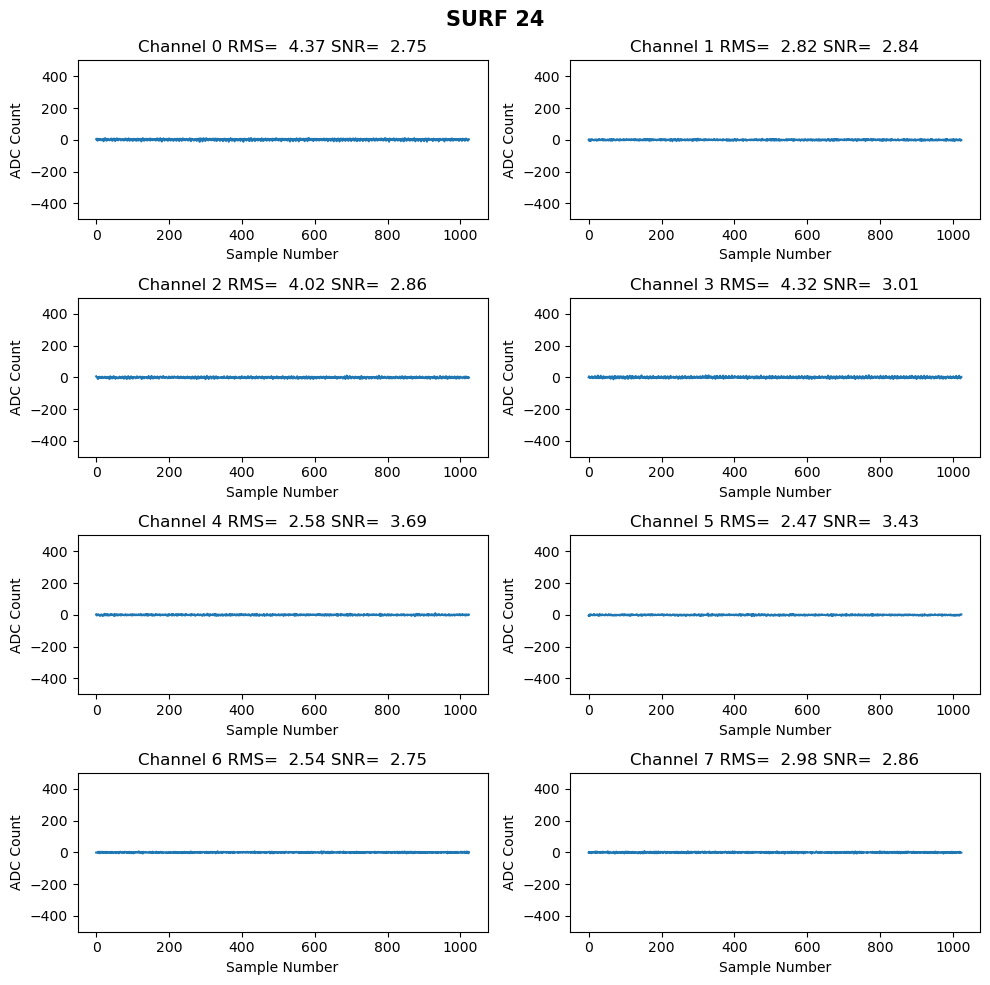

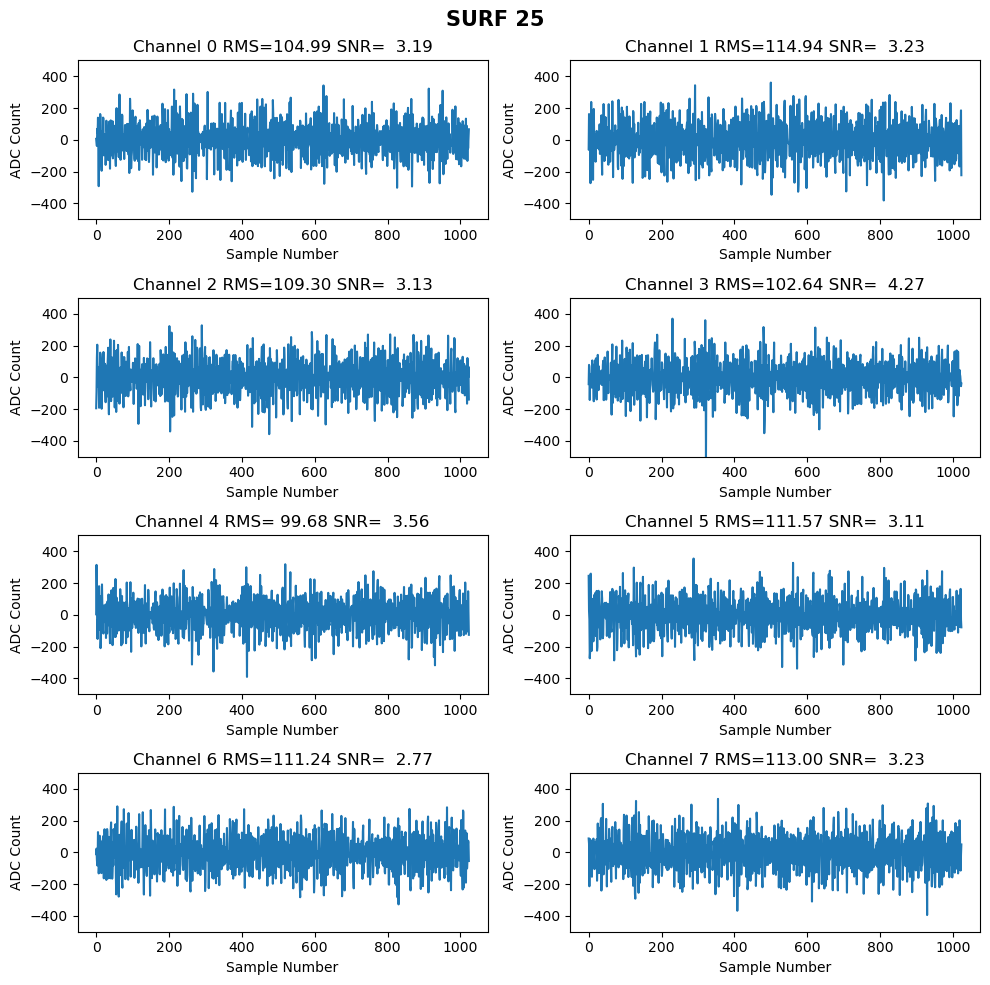

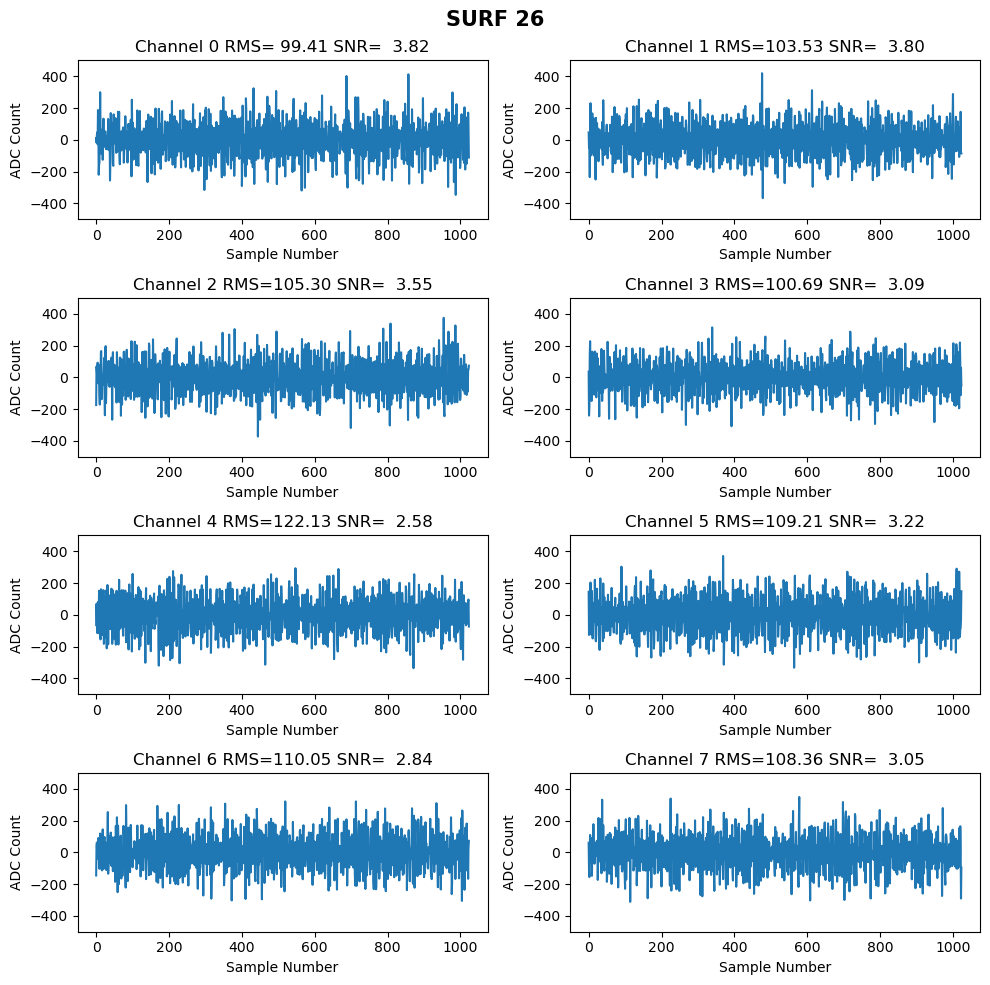

In [ ]:
data = np.empty((0))
for i in range(len(theEvent)):
    ## First 8 bytes of each fragments is the header, strip that off (offset = 8) during byte reading and concatenation
    data = np.concatenate((data, np.frombuffer(theEvent[i], dtype = np.int16, offset = 8)))
print(len(data))
## First 128 bytes of data is more headers, remove it
data = data[128:]

## Reshape to be split into SURF#, Channel#
data = np.reshape(data, (28, 8, 1024))

## Plot all the different surfs and channels on seperate graphs
fn = []
for ii in [25,26]:
    fig, axs = plt.subplots(nrows = 4, ncols = 2, figsize=(10,10))

    plt.suptitle('SURF ' + str(ii), fontsize = 15, fontweight = 'bold')
    for i in range(8):
        rms=np.sqrt(np.mean(np.square(data[ii,i,0:256])))
        pkpk=np.max(data[ii,i,:])-np.min(data[ii,i,:])
        snr=0.5*pkpk/rms            
        if (i%2==0):
            axs[i//2, 0].plot(data[ii, i])
            axs[i//2, 0].set_title('Channel ' + str(i) + f" RMS={rms:6.2f} SNR={snr:6.2f}")
            axs[i//2, 0].set_xlabel('Sample Number')
            axs[i//2, 0].set_ylabel('ADC Count')
            axs[i//2, 0].set_ylim(ymin=-500, ymax=500)

        else:
            axs[(i-1)//2, 1].plot(data[ii, i])
            axs[(i-1)//2, 1].set_title('Channel ' + str(i) + f" RMS={rms:6.2f} SNR={snr:6.2f}")
            axs[(i-1)//2, 1].set_xlabel('Sample Number')
            axs[(i-1)//2, 1].set_ylabel('ADC Count')
            axs[(i-1)//2, 1].set_ylim(ymin=-500, ymax=500)
        


    #fig.savefig('test.pdf')
    plt.tight_layout()
    #plt.show()
    filename = './SURF_' + str(ii) + 'data.pdf'
    fig.savefig(filename)
    fn.append(filename)


## Merge all the graphs into a single pdf
merger = PdfWriter()

for pdf in fn:
    merger.append(pdf)

merger.write("test.pdf")
merger.close()
#plt.show()

In [7]:
#delay and sum with beam 5
#NEED TO LOWPASS FILTER FIRST
#ALSO MATCHED FILTER
#DO THESE BEFORE SCALING
delays=[0,13,13,13,1,13,13,13] #BEAM 5
lpk=[-23.,0.,105.,0.,-263.,0.,526.,0.,-949.,0.,1672.,0.,-3216.,0.,10342.,16384.,10342.,0.,-3216.,0.,1672.,0.,-949.,0.,526.,0.,-263.,0.,105.,0.,-23.]
mfk=[ 1,1,-1,-2,1,4,1,-4,-4,0,4,2,0,-2,-2,-1,0,1,2,1,0,-1,-1,-1,0,1,1,1,1,0, -1,-1,-1,0,0,1,1]
for ii in [25,26]:
    delsum=np.zeros(512)
    data = np.apply_along_axis(lambda m: np.convolve(m,lpk, mode='valid'), axis=-1, arr=data)
    print(data.shape)
    data = np.apply_along_axis(lambda m: np.convolve(m,mfk[::-1], mode='valid'), axis=-1, arr=data)
    print(data.shape)
    for i in range(8):
        rms=np.sqrt(np.mean(np.square(data[ii,i,0:200])))
        snippet=data[ii,i,(256-delays[i]):(768-delays[i])]
        snippet=4*snippet/rms
        delsum=delsum+snippet
    delrms=np.sqrt(np.mean(np.square(delsum)))
    #REMEMBER TO SATURATE THE SNIPPETS AT +/- 15.5 AND DO THE WHOLE RECORD (OR MORE THAN MIDDLE HALF)
    #pkpk=np.max(data[ii,i,:])-np.min(data[ii,i,:])
    #snr=0.5*pkpk/rms 
    boxcar=np.ones(16)
    trig=np.convolve(boxcar,np.square(delsum), mode="valid")
    print(len(trig))
    maxtrig=np.max(trig)
    mintrig=np.min(trig)
    print(f"Surf {ii:2d}, Max: {np.max(delsum)}, Min: {np.min(delsum)}, RMS: {delrms:5.2f}, Trig: {maxtrig} {mintrig}") 
    

(28, 8, 994)
(28, 8, 958)
497
Surf 25, Max: 31.840900311715156, Min: -36.188114234766054, RMS: 11.34, Trig: 5359.140231852353 294.04791370765264
(28, 8, 928)
(28, 8, 892)
497
Surf 26, Max: 39.12655869764768, Min: -38.98619066206238, RMS: 11.31, Trig: 8354.137676996335 272.7696954343502


In [8]:
print(delsum)

[ 5.95860099e+00 -1.46194887e+01 -8.30548902e+00  7.48462270e+00
  5.43064487e+00 -1.06552024e+01 -1.42874255e+01  1.58067887e+00
  1.43758905e+01  7.81393741e+00 -3.87720273e+00 -1.17974008e+00
  7.85796196e+00  1.20210905e+00 -1.81073616e+01 -2.12609045e+01
  3.53126134e+00  2.90427534e+01  2.35187380e+01 -6.48792998e+00
 -2.54680660e+01 -1.53577248e+01  5.89698360e+00  1.33942544e+01
  5.49859868e+00 -2.98698182e+00 -4.41775019e+00 -2.30302858e+00
  7.46981123e-01  4.99944823e+00  5.98225242e+00 -1.65190475e+00
 -1.14929149e+01 -9.30552643e+00  5.76679992e+00  1.53229714e+01
  5.52642565e+00 -1.16025967e+01 -1.25577561e+01  5.21667793e+00
  1.81589236e+01  7.10299960e+00 -1.69408322e+01 -2.52675197e+01
 -5.70421332e+00  2.31533784e+01  3.21034162e+01  1.11415897e+01
 -2.14173942e+01 -3.62711981e+01 -1.96071510e+01  1.39355955e+01
  3.40488279e+01  2.37094849e+01 -4.29377088e+00 -2.26743975e+01
 -1.94361474e+01 -5.72632557e+00  4.51140353e+00  1.04451002e+01
  1.48091832e+01  1.14574

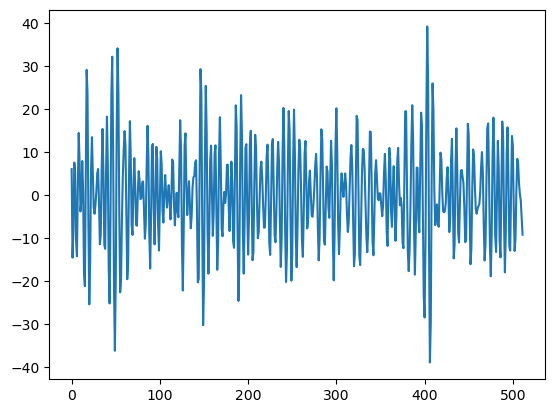

In [9]:
plt.plot(delsum)

In [10]:
print(trig)

[1851.13298544 1828.09786641 2457.84994169 2941.99982939 2928.0734879
 3547.20397155 3669.53034354 3500.17423206 3677.0817361  3500.65009591
 3448.51453837 3452.99835414 3456.91050814 3395.72092276 3419.27033922
 3127.18113982 2677.88386698 2797.50115228 2040.61244952 1520.73739522
 1713.43761103 1095.35660422  994.11714428 1117.03996717  964.84764605
 1264.35956448 1305.89010738 1573.36538756 2206.50899851 2238.4890673
 2749.57351619 3744.4155069  3865.8217378  4192.43942064 5421.44641043
 5772.63080065 5732.03817131 6860.81947345 7288.33889762 7149.07812744
 7635.99270301 7684.01002158 7666.34822283 7399.70918765 6870.36175394
 7057.13561212 6652.32960652 5639.61518828 5900.58681648 5700.44511012
 4401.47525437 4309.93013317 4194.21071893 3083.47446413 2608.66646241
 2593.06377568 2151.76441436 1779.46175045 1795.76014426 1827.10608978
 1718.19014238 1528.88326106 1408.05311459 1391.19543203 1006.6976784
  756.66944449  749.58098595  468.98910307  494.8251602   493.47312759
  448.544

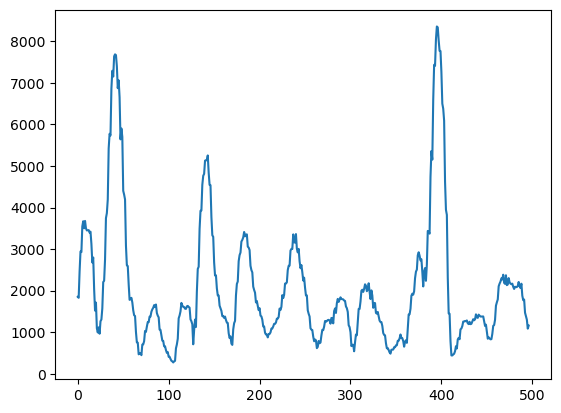

In [11]:
plt.plot(trig)